![Texto alternativo](https://upload.wikimedia.org/wikipedia/commons/f/f1/Prime_Video.png)

1. Understanding what content is available in different countries
2. Identifying similar content by matching text-based features
3. Network analysis of Actors / Directors and find interesting insights
4. Does Netflix has more focus on TV Shows than movies in recent years.

In [237]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True) 
# write cf.getThemes() to find all themes available

In [238]:
cf.getThemes() 

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [239]:
df = pd.read_csv("amazon_prime.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


---


In [292]:

porcentajes_nulos = df.isna().sum()*100/df.shape[0]
porcentajes_nulos = round(porcentajes_nulos,2)
porcentajes_nulos

show_id          0.00
type             0.00
title            0.00
director        21.55
cast            12.75
country         93.05
date_added      98.40
release_year     0.00
rating           3.49
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [264]:
#Is there a reason why users are not allowed to know their country where to use the account?
df["country"].sample(10)


3553              NaN
6451              NaN
844               NaN
9380              NaN
3623              NaN
3022    United States
9209              NaN
7856              NaN
8908              NaN
8949              NaN
Name: country, dtype: object

Preserving the Unknown Location is an important piece of information to show in the results. For this reason, I replaced null values with Unknown

In [243]:
df["country"].value_counts()

country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: count, Length: 86, dtype: int64

In [244]:
frecuency_count = df["country"].value_counts().head(4)
frecuency_count

country
United States     253
India             229
United Kingdom     28
Canada             16
Name: count, dtype: int64

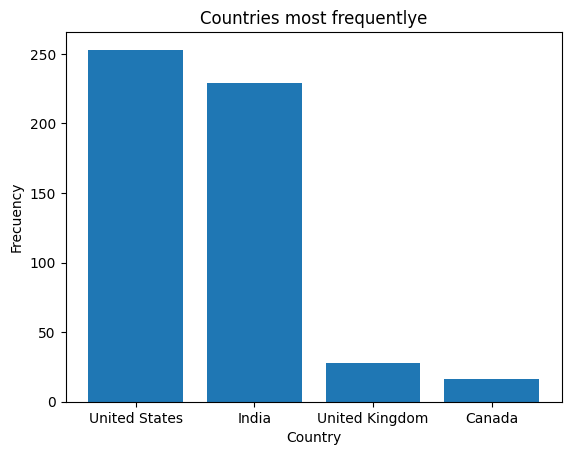

In [245]:
# Crea un gráfico de barras
plt.bar(frecuency_count.index, frecuency_count.values)

# Agrega etiquetas y título
plt.xlabel('Country')
plt.ylabel('Frecuency')
plt.title('Countries most frequentlye')

plt.show()

In [246]:
country_count = df["country"].value_counts().head(4)

In [247]:
def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

df['country_number'] = df['country'].apply(contar_palabras)

df[['country', 'country_number']].sample(10)


,country,country_number
397,United States,1
6403,NaN,0
5887,NaN,0
4920,NaN,0
5268,India,1
1241,NaN,0
9109,NaN,0
145,NaN,0
7959,NaN,0
7895,NaN,0


In [248]:
df_filtrado = df[df['country_number'] >= 2]
df_filtrado["country_number"].head(10)

165    2
175    2
193    2
255    2
261    3
365    3
366    3
373    4
455    2
546    3
Name: country_number, dtype: int64

There are 256 records that have two or more country locations

In [249]:
df_filtrado["country_number"].value_counts().sum()

104

In [250]:
def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

df['country_number'] = df['country'].apply(contar_palabras)

df[['country', 'country_number']].sample(10)

,country,country_number
4349,NaN,0
4240,NaN,0
3010,NaN,0
4555,NaN,0
1167,NaN,0
1472,NaN,0
1484,United States,1
3776,NaN,0
6297,NaN,0
8692,NaN,0


In [251]:

def contar_palabras(cadena):
    if isinstance(cadena, str):
        return len(cadena.split(','))
    else:
        return 0

df['country_number'] = df['country'].apply(contar_palabras)

# Cambiar "Country" a "Otros" si "country_number" es mayor o igual a 2
def reemplazar_con_otros(row):
    if row['country_number'] >= 2:
        return 'Several countries'
    else:
        return row['country']

df['country'] = df.apply(reemplazar_con_otros, axis=1)

# Eliminar la columna 'country_number' si ya no la necesitas
df.drop('country_number', axis=1, inplace=True)


In [252]:
df_filtrado_otros = df["country"].value_counts().head()


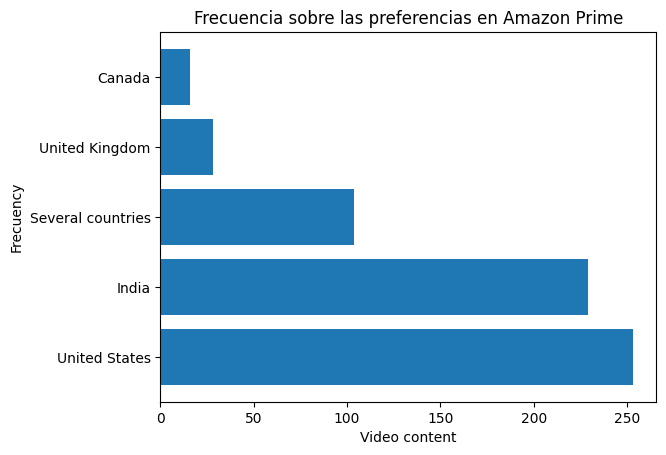

In [253]:
plt.barh(df_filtrado_otros.index, df_filtrado_otros.values)
df_filtrado_otros = df_filtrado_otros.sort_values(ascending=False)

plt.xlabel('Video content')
plt.ylabel('Frecuency')
plt.title('Frecuencia sobre las preferencias en Amazon Prime')

plt.show()

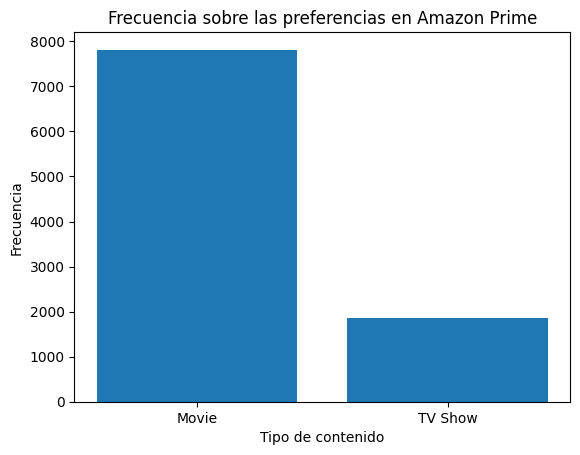

In [254]:
frecuencia = df['type'].value_counts()

plt.bar(frecuencia.index, frecuencia.values)

plt.xlabel('Tipo de contenido')
plt.ylabel('Frecuencia')
plt.title('Frecuencia sobre las preferencias en Amazon Prime')

plt.show()

Film director

In [255]:
director = df["director"].value_counts().head(10)

In [256]:
condicion = (df["director"] == 1)
director = df.drop(df[condicion].index)

In [257]:
frecuencia_director = director["director"].value_counts().head(5)

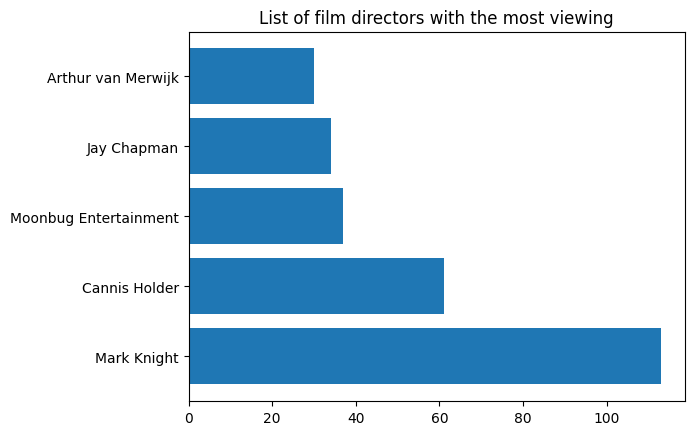

In [258]:
plt.barh(frecuencia_director.index, frecuencia_director.values)
frecuencia_director = frecuencia_director.sort_values(ascending=True)

plt.title("List of film directors with the most viewing")

plt.show()

In [259]:
df[["type", "director"]].sample(10)

,type,director
7730,Movie,Christopher Morahan
8530,Movie,Jeremy Alter
2074,Movie,Alison Chernick
922,TV Show,NaN
6161,Movie,Oliver Parker
1262,TV Show,NaN
4061,Movie,mink
1563,Movie,Martín Deus
5364,Movie,Kang Nam Kyu
8450,Movie,Patrick Marber


In [269]:
df_movies = df[df["type"] == "Movie"]

df_movies[["type", "director"]].value_counts()

type   director             
Movie  Mark Knight              113
       Cannis Holder             61
       Moonbug Entertainment     37
       Jay Chapman               34
       Arthur van Merwijk        30
                               ... 
       Hemant Dhome               1
       Helen Slinger              1
       Helen Langridge            1
       Helen Hunt                 1
       藤村明世                       1
Name: count, Length: 5773, dtype: int64

TV Show has no movie director

In [283]:
df_movies = df[df["type"] == "TV Show"]

df_movies[["type", "director"]]

,type,director
17,TV Show,NaN
18,TV Show,NaN
20,TV Show,NaN
21,TV Show,NaN
23,TV Show,NaN
...,...,...
9651,TV Show,NaN
9655,TV Show,NaN
9661,TV Show,NaN
9664,TV Show,NaN


In [285]:
df["duration"]

0         113 min
1         110 min
2          74 min
3          69 min
4          45 min
          ...    
9663       60 min
9664    4 Seasons
9665       90 min
9666     1 Season
9667      103 min
Name: duration, Length: 9668, dtype: object

In [284]:
resultados_groupby = df.groupby('type')['duration'].mean()
resultados_groupby

TypeError: agg function failed [how->mean,dtype->object]